# Sparks Foundation Task-8
# Name:- Vikram kumar
# EDA on Covid19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Downloads\owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58256 entries, 0 to 58255
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57929 non-null  object 
 1   continent                           57602 non-null  object 
 2   location                            58256 non-null  object 
 3   date                                58256 non-null  object 
 4   total_cases                         54618 non-null  float64
 5   new_cases                           57326 non-null  float64
 6   new_cases_smoothed                  56512 non-null  float64
 7   total_deaths                        45149 non-null  float64
 8   new_deaths                          57326 non-null  float64
 9   new_deaths_smoothed                 56512 non-null  float64
 10  total_cases_per_million             54327 non-null  float64
 11  new_cases_per_million               57262

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.461800e+04,57326.000000,56512.000000,4.514900e+04,57326.000000,56512.000000,54327.000000,57262.000000,56447.000000,44873.000000,...,51113.000000,34064.000000,51771.000000,53667.000000,40239.000000,39725.000000,24556.000000,46606.000000,57182.000000,49977.000000
mean,1.734711e+05,2013.233332,1975.679655,6.980749e+03,47.923298,47.471389,3259.541083,40.878132,39.820158,97.255559,...,20600.874225,12.457448,252.761610,8.072897,10.739171,32.640437,52.061490,3.088728,73.932032,0.722053
std,1.753529e+06,18965.655242,18397.522679,5.683789e+04,399.609207,384.144112,6426.042258,136.946278,104.649540,183.074864,...,20301.779044,19.441512,117.549604,4.195357,10.470036,13.454578,31.647281,2.512098,7.398434,0.153299
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.850000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,92.590000,0.000000,0.269000,4.065000,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.141000e+03,14.000000,19.714000,8.600000e+01,0.000000,0.286000,616.393000,2.260500,3.946000,20.699000,...,13913.839000,2.000000,238.339000,7.140000,6.400000,31.400000,52.232000,2.500000,75.290000,0.752000
75%,2.349150e+04,243.000000,253.571000,7.470000e+02,4.000000,4.143000,3589.563000,26.728000,30.423500,94.775000,...,31400.840000,18.800000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.770598e+07,677321.000000,597087.857000,1.373695e+06,11832.000000,9775.429000,79492.655000,8652.658000,2472.188000,1312.641000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [6]:
df.shape  #shape of dataset

(58256, 50)

In [7]:
df.isnull().sum()

iso_code                                327
continent                               654
location                                  0
date                                      0
total_cases                            3638
new_cases                               930
new_cases_smoothed                     1744
total_deaths                          13107
new_deaths                              930
new_deaths_smoothed                    1744
total_cases_per_million                3929
new_cases_per_million                   994
new_cases_smoothed_per_million         1809
total_deaths_per_million              13383
new_deaths_per_million                  994
new_deaths_smoothed_per_million        1809
reproduction_rate                     20560
icu_patients                          53632
icu_patients_per_million              53632
hosp_patients                         53060
hosp_patients_per_million             53060
weekly_icu_admissions                 57860
weekly_icu_admissions_per_millio

In [8]:
df1=df[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2019-12-31,NaN,0.0,NaN,NaN,NaN
1,2020-01-01,NaN,0.0,NaN,NaN,NaN
2,2020-01-02,NaN,0.0,NaN,NaN,NaN
3,2020-01-03,NaN,0.0,NaN,NaN,NaN
4,2020-01-04,NaN,0.0,NaN,NaN,NaN


In [9]:
df1.mean()

total_cases     1.734711e+05
new_cases       2.013233e+03
total_deaths    6.980749e+03
new_tests       2.886339e+04
total_tests     2.384886e+06
dtype: float64

In [10]:
df1.cov()

,total_cases,new_cases,total_deaths,new_tests,total_tests
total_cases,3.074864e+12,3.309806e+10,1.066711e+11,7.516081e+10,7.300338e+12
new_cases,3.309806e+10,3.596961e+08,1.176761e+09,8.256362e+08,6.940628e+10
total_deaths,1.066711e+11,1.176761e+09,3.230546e+09,1.974178e+09,1.879343e+11
new_tests,7.516081e+10,8.256362e+08,1.974178e+09,1.348553e+10,1.189205e+12
total_tests,7.300338e+12,6.940628e+10,1.879343e+11,1.189205e+12,1.179645e+14


In [11]:
df1.corr()

,total_cases,new_cases,total_deaths,new_tests,total_tests
total_cases,1.000000,0.967078,0.974085,0.910830,0.945126
new_cases,0.967078,1.000000,0.964693,0.884130,0.804900
total_deaths,0.974085,0.964693,1.000000,0.835538,0.846193
new_tests,0.910830,0.884130,0.835538,1.000000,0.917756
total_tests,0.945126,0.804900,0.846193,0.917756,1.000000


In [12]:

df1.var()


total_cases     3.074864e+12
new_cases       3.596961e+08
total_deaths    3.230546e+09
new_tests       1.348553e+10
total_tests     1.179645e+14
dtype: float64

In [13]:
df1.std()

total_cases     1.753529e+06
new_cases       1.896566e+04
total_deaths    5.683789e+04
new_tests       1.161272e+05
total_tests     1.086115e+07
dtype: float64

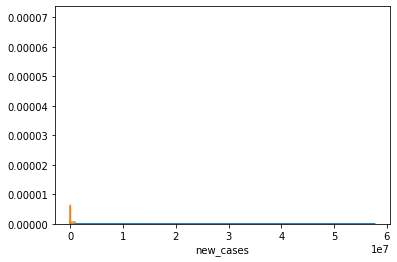

In [14]:
sns.distplot(df1['total_cases'])
sns.distplot(df1['new_cases']);

Text(0.5, 0, 'Month')

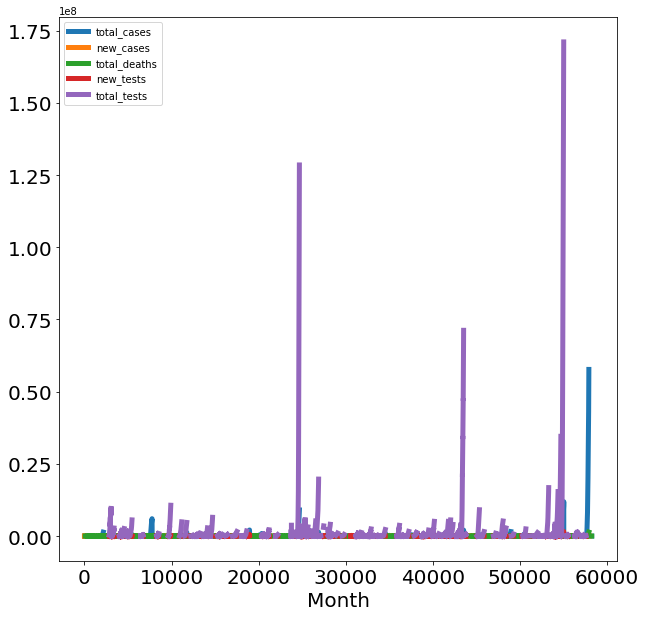

In [15]:
df1.plot(figsize = (10 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

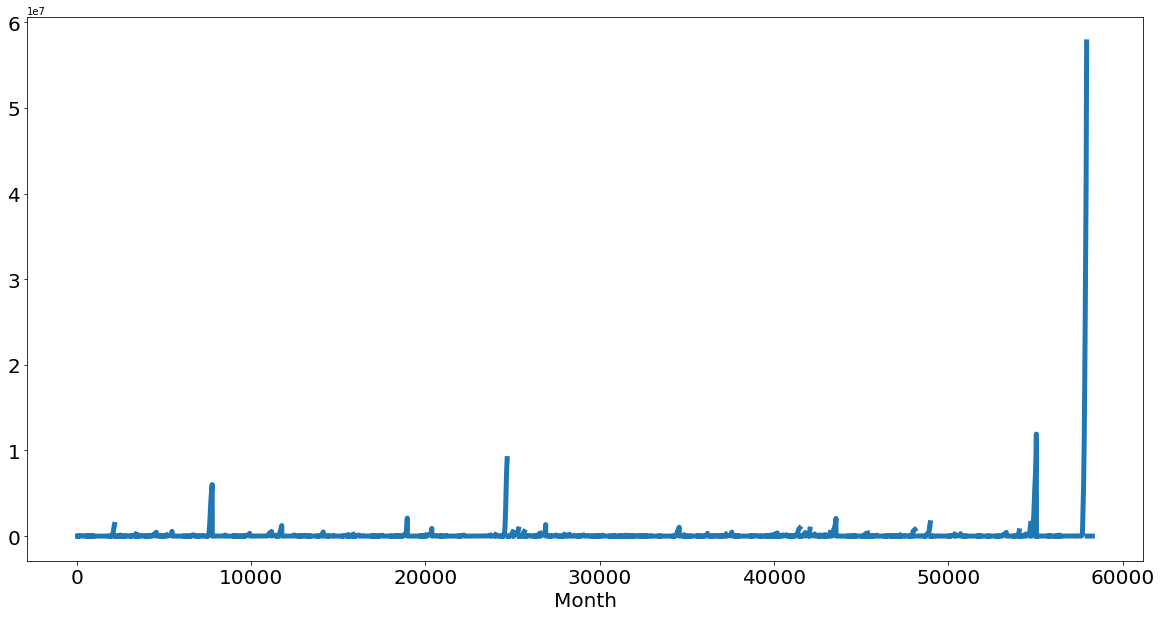

In [16]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

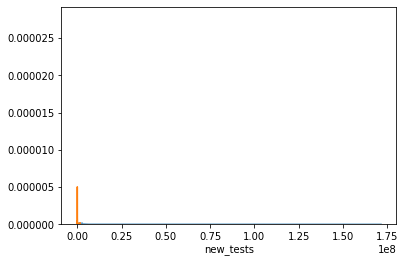

In [17]:
sns.distplot(df1['total_tests'])
sns.distplot(df1['new_tests']);

Text(0.5, 0, 'Month')

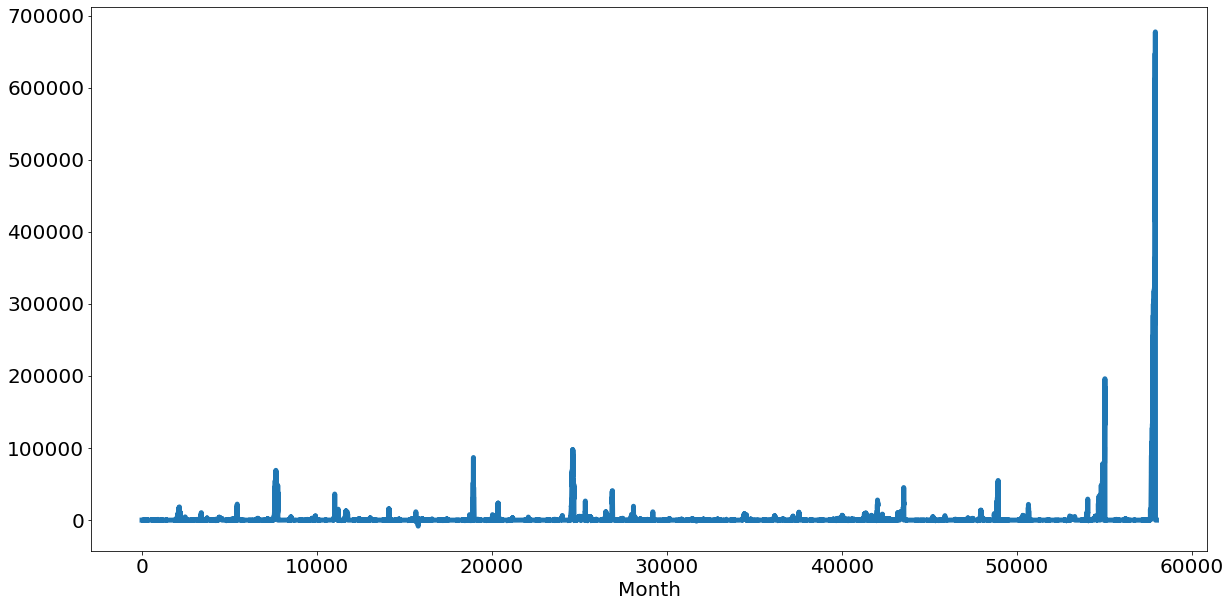

In [18]:

df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

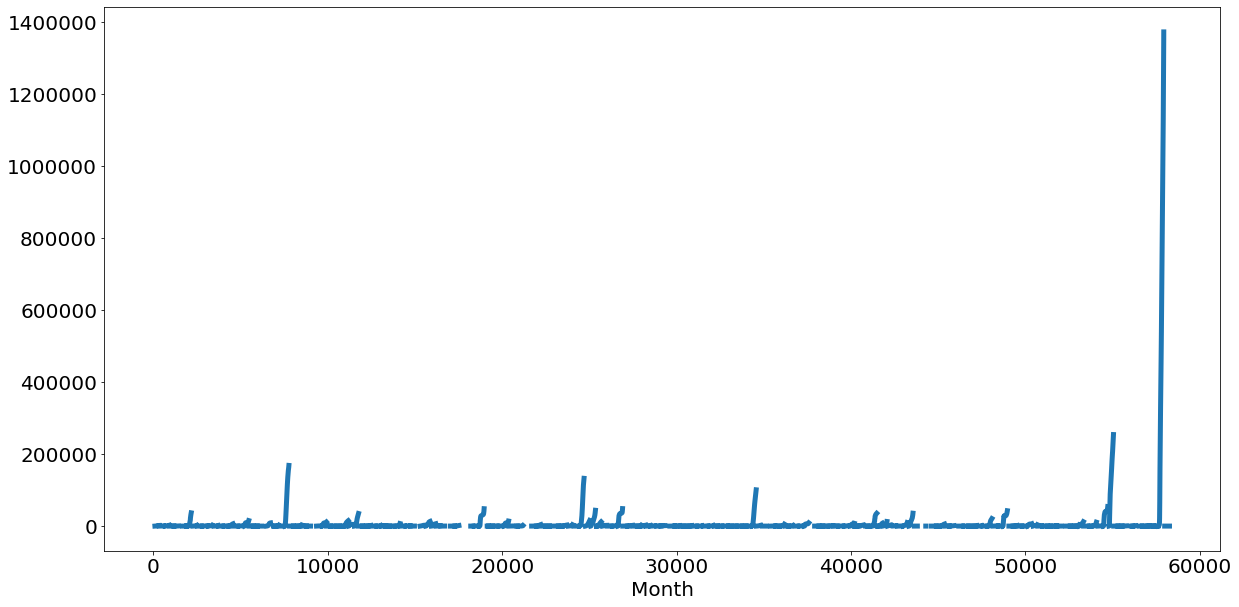

In [19]:

df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

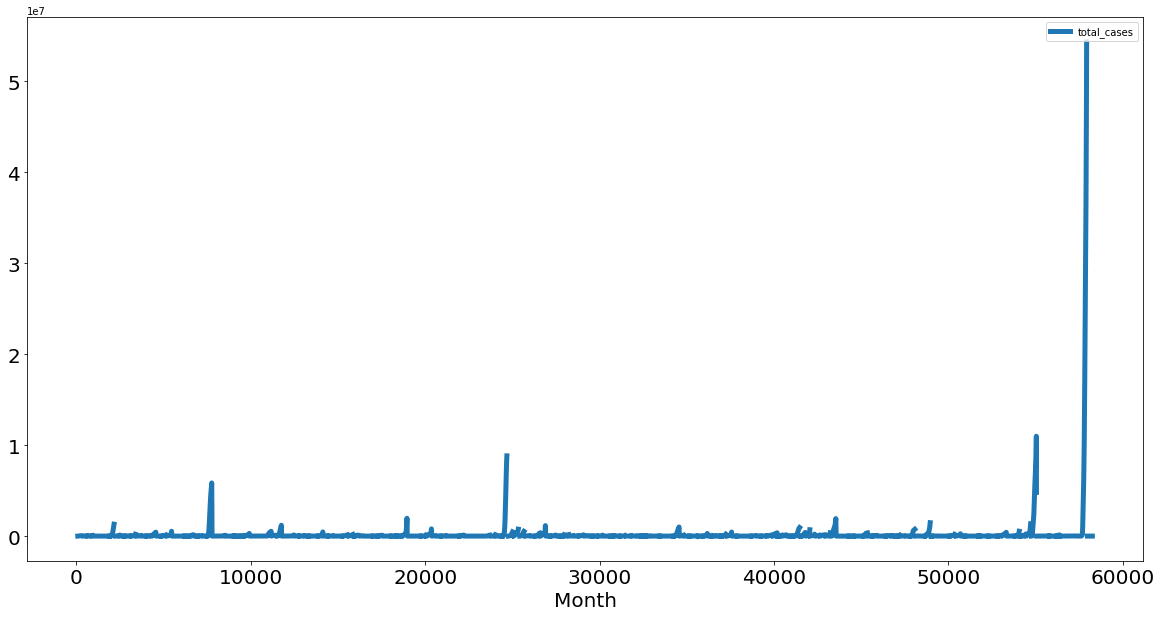

In [20]:
#Trends and Seasonality in TimeSeries Dataset

total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

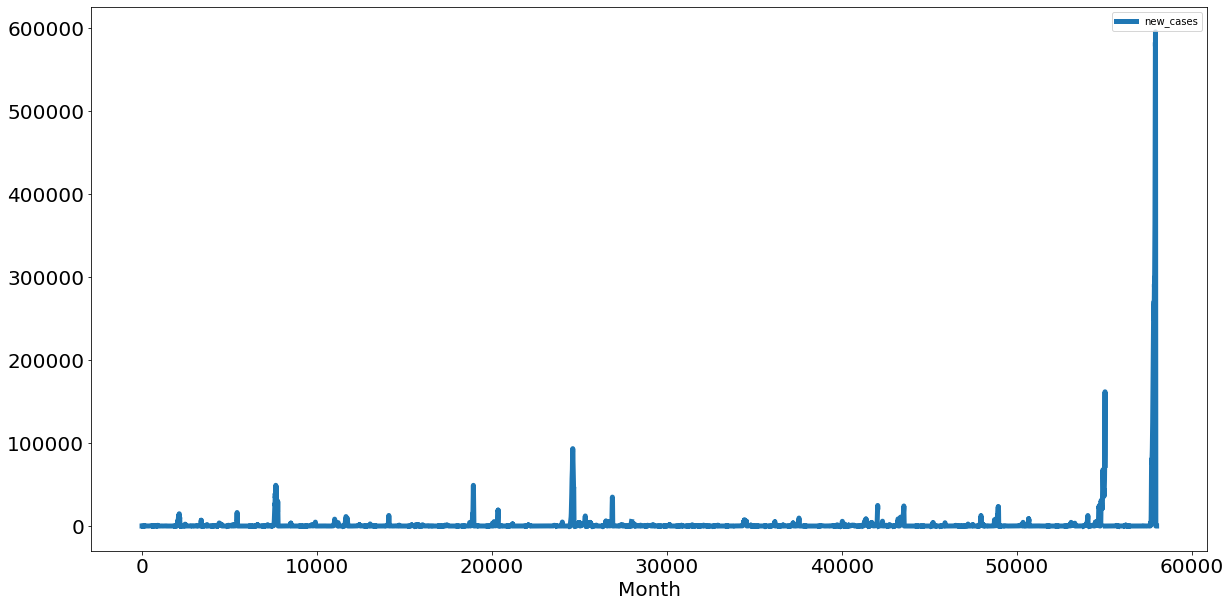

In [21]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

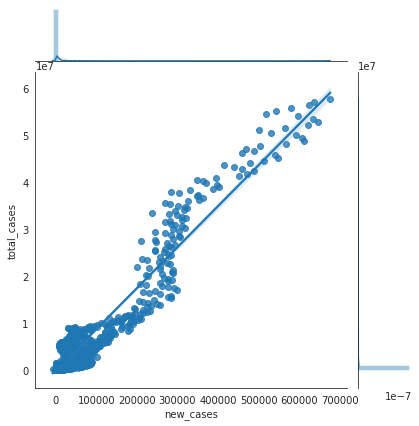

In [22]:

with sns.axes_style('white'):
    sns.jointplot("new_cases", "total_cases", data=df1, kind='reg')

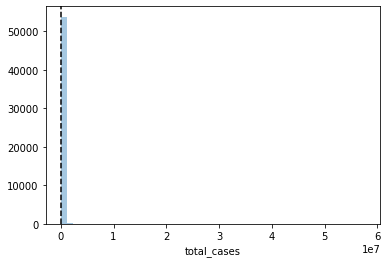

In [23]:
sns.distplot(df1['total_cases'], kde=False);
plt.axvline(0, color="k", linestyle="--");

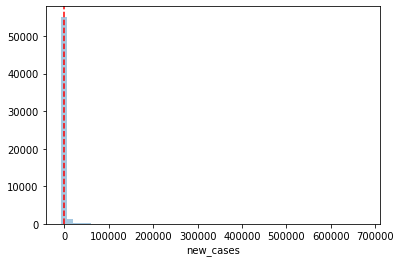

In [24]:

sns.distplot(df1['new_cases'], kde=False);
plt.axvline(0, color="r", linestyle="--");

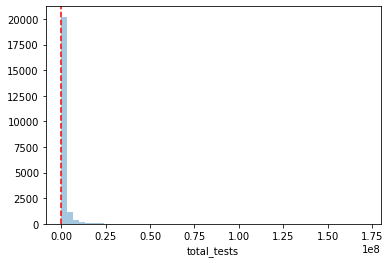

In [25]:
sns.distplot(df1['total_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

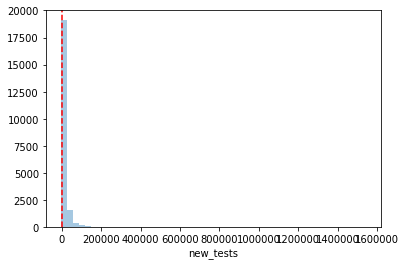

In [26]:
sns.distplot(df1['new_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

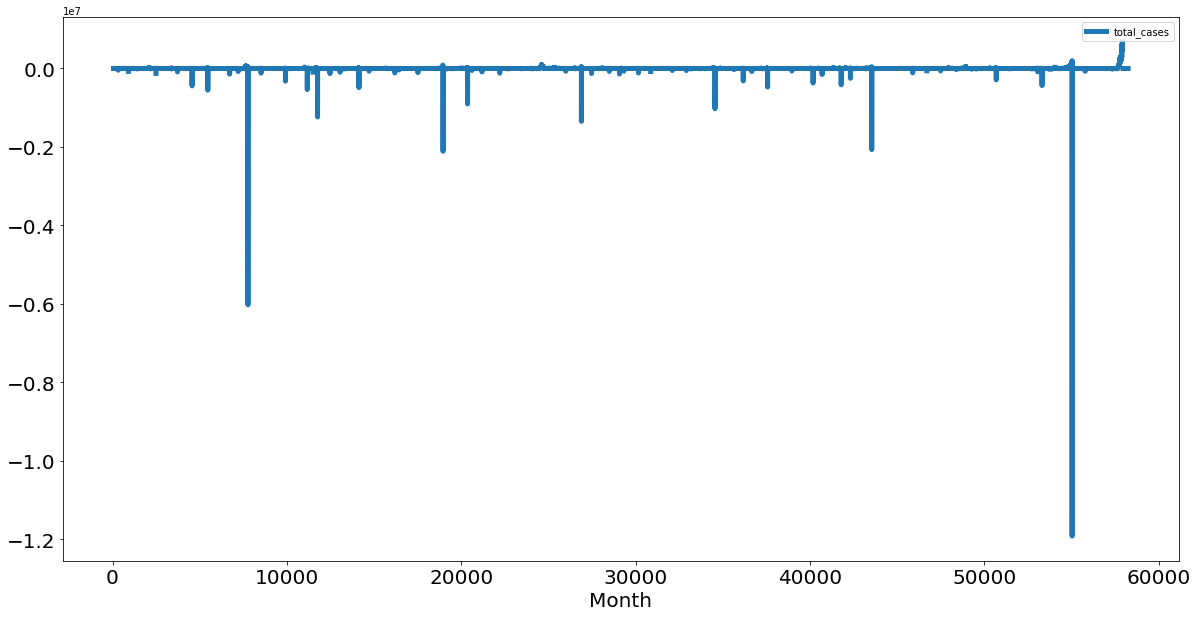

In [27]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);

Text(0.5, 0, 'Month')

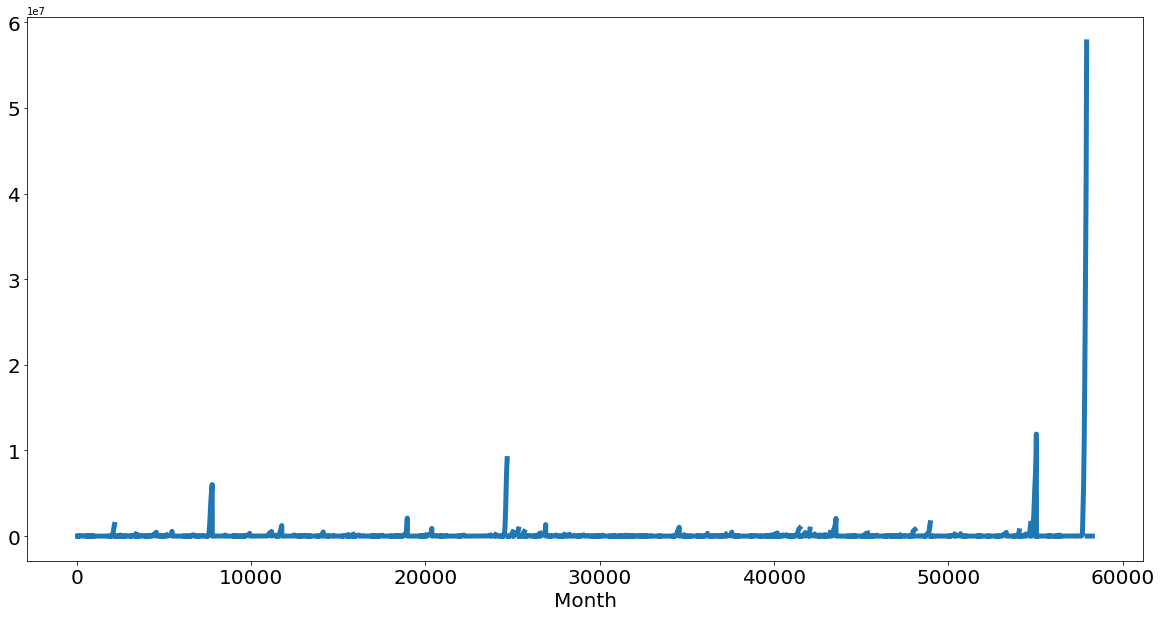

In [28]:
df1.total_cases.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)


Text(0.5, 0, 'Month')

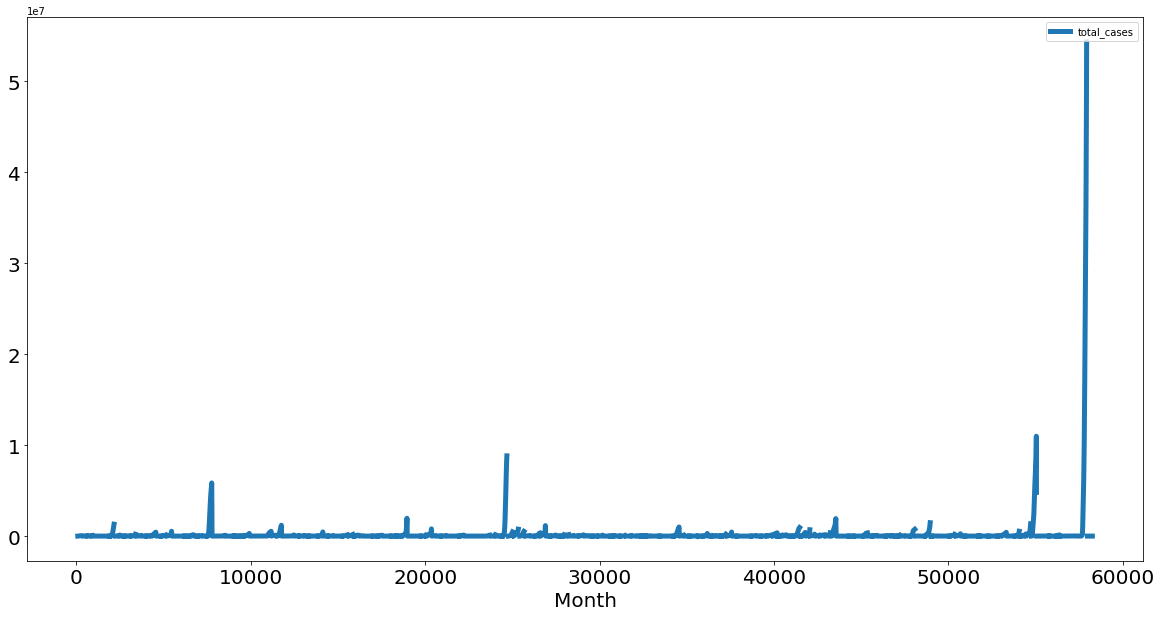

In [29]:

total_cases=df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)

In [30]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [31]:
ind = df[df['location']=='India']
ind

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24361,IND,Asia,India,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24362,IND,Asia,India,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24363,IND,Asia,India,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24364,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24365,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24683,IND,Asia,India,2020-11-17,8874290.0,29163.0,40365.714,130519.0,449.0,494.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24684,IND,Asia,India,2020-11-18,8912907.0,38617.0,39556.571,130993.0,474.0,488.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24685,IND,Asia,India,2020-11-19,8958483.0,45576.0,39223.857,131578.0,585.0,493.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24686,IND,Asia,India,2020-11-20,9004365.0,45882.0,39367.143,132162.0,584.0,499.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [32]:
pd.DataFrame(ind.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
iso_code,0
continent,0
location,0
date,0
total_cases,31
new_cases,1
new_cases_smoothed,6
total_deaths,73
new_deaths,1
new_deaths_smoothed,6


In [33]:
ind['date'] = pd.to_datetime(ind['date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:

ind = ind.drop(['icu_patients','icu_patients_per_million', 'hosp_patients','hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions','weekly_hosp_admissions_per_million','tests_units','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index'], axis=1)

In [35]:
ind.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,reproduction_rate,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
total_cases,1.000000,0.730662,0.761406,0.995264,0.622393,0.674242,1.000000,0.730663,0.761406,0.995264,...,-0.717123,0.995501,0.901978,0.995501,0.901971,0.937122,0.937125,-0.041440,-0.059549,0.082459
new_cases,0.730662,1.000000,0.993474,0.751416,0.946377,0.974908,0.730662,1.000000,0.993474,0.751416,...,-0.725641,0.628994,0.883478,0.628993,0.883497,0.887648,0.887646,-0.508821,0.499901,0.354881
new_cases_smoothed,0.761406,0.993474,1.000000,0.782688,0.935935,0.974587,0.761406,0.993474,1.000000,0.782689,...,-0.735251,0.670491,0.902331,0.670491,0.902327,0.913381,0.913380,-0.481484,0.461083,0.331669
total_deaths,0.995264,0.751416,0.782688,1.000000,0.634703,0.694932,0.995264,0.751417,0.782689,1.000000,...,-0.755650,0.985734,0.928051,0.985734,0.928053,0.960062,0.960069,-0.118411,0.029872,-0.499481
new_deaths,0.622393,0.946377,0.935935,0.634703,1.000000,0.967542,0.622393,0.946377,0.935935,0.634704,...,-0.733689,0.496073,0.768786,0.496072,0.768775,0.773860,0.773867,-0.616094,0.622861,0.407430
new_deaths_smoothed,0.674242,0.974908,0.974587,0.694932,0.967542,1.000000,0.674242,0.974908,0.974587,0.694932,...,-0.773321,0.561739,0.830442,0.561738,0.830447,0.838742,0.838754,-0.616892,0.614824,0.393903
total_cases_per_million,1.000000,0.730662,0.761406,0.995264,0.622393,0.674242,1.000000,0.730663,0.761406,0.995264,...,-0.717123,0.995501,0.901978,0.995501,0.901971,0.937122,0.937125,-0.041440,-0.059549,0.082459
new_cases_per_million,0.730663,1.000000,0.993474,0.751417,0.946377,0.974908,0.730663,1.000000,0.993474,0.751417,...,-0.725641,0.628995,0.883479,0.628995,0.883498,0.887649,0.887647,-0.508820,0.499900,0.354881
new_cases_smoothed_per_million,0.761406,0.993474,1.000000,0.782689,0.935935,0.974587,0.761406,0.993474,1.000000,0.782689,...,-0.735252,0.670491,0.902331,0.670491,0.902327,0.913381,0.913380,-0.481484,0.461084,0.331669
total_deaths_per_million,0.995264,0.751416,0.782689,1.000000,0.634704,0.694932,0.995264,0.751417,0.782689,1.000000,...,-0.755651,0.985734,0.928052,0.985734,0.928053,0.960062,0.960069,-0.118411,0.029872,-0.499480


Text(0.5, 6.79999999999999, 'NEW CASES SMOOTHED')

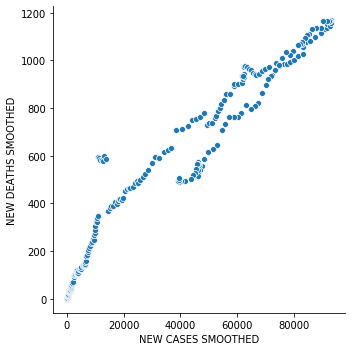

In [36]:
sns.relplot(x='new_cases_smoothed', y='new_deaths_smoothed', data=ind)
plt.ylabel('NEW DEATHS SMOOTHED',fontsize=10)
plt.xlabel('NEW CASES SMOOTHED',fontsize=10)

Text(-2.700000000000003, 0.5, 'NEW DEATHS')

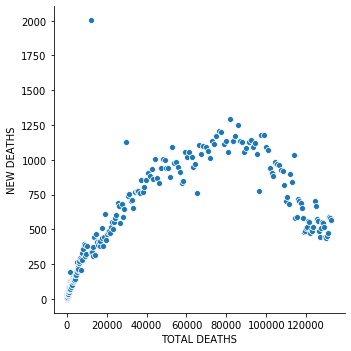

In [37]:
sns.relplot(x='total_deaths',y='new_deaths',data=ind)
plt.xlabel('TOTAL DEATHS',fontsize=10)
plt.ylabel('NEW DEATHS',fontsize=10)

Text(6.799999999999997, 0.5, 'NEW TESTS SMOOTHED PER THOUSAND')

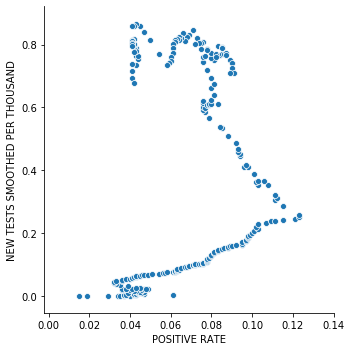

In [38]:
sns.relplot(x='positive_rate',y='new_tests_smoothed_per_thousand',data=ind)
plt.xlabel('POSITIVE RATE',fontsize=10)
plt.ylabel('NEW TESTS SMOOTHED PER THOUSAND',fontsize=10)

Text(-2.700000000000003, 0.5, 'NEW DEATHS')

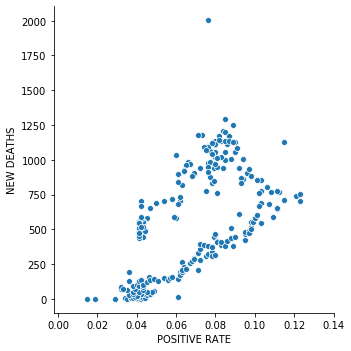

In [39]:
sns.relplot(x='positive_rate',y='new_deaths',data=ind)
plt.xlabel('POSITIVE RATE',fontsize=10)
plt.ylabel('NEW DEATHS',fontsize=10)

Text(0.5, 6.79999999999999, 'TOTAL CASES')

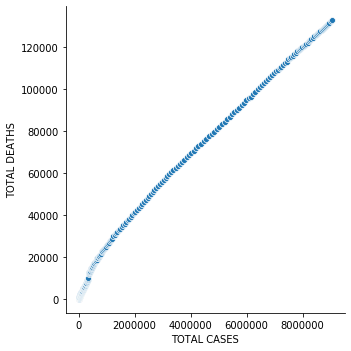

In [40]:
sns.relplot(x='total_cases',y='total_deaths',data=ind)
plt.ylabel('TOTAL DEATHS',fontsize=10)
plt.xlabel('TOTAL CASES',fontsize=10)

In [41]:
new_data=['iso_code', 'continent', 'location', 'date', 'total_cases','total_deaths','new_deaths_smoothed','population', 
              'population_density', 'median_age', 'aged_65_older','aged_70_older', 'gdp_per_capita', 'extreme_poverty',
              'cardiovasc_death_rate','diabetes_prevalence', 'female_smokers','male_smokers', 'handwashing_facilities',
              'hospital_beds_per_thousand','life_expectancy', 'human_development_index']

In [42]:
new_df=df[new_data]

In [43]:
new_df['date'] = pd.to_datetime(new_df['date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
new_df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [45]:
Asia = new_df[new_df['continent']=='Asia']
Asia.location.unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
       'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan',
       'Tajikistan', 'Thailand', 'Timor', 'Turkey',
       'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
      dtype=object)

In [46]:
Asia.head()

,iso_code,continent,location,date,total_cases,total_deaths,new_deaths_smoothed,population,population_density,median_age,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,NaN,NaN,38928341.0,54.422,18.6,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,NaN,NaN,38928341.0,54.422,18.6,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,NaN,NaN,38928341.0,54.422,18.6,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,NaN,NaN,38928341.0,54.422,18.6,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,NaN,NaN,38928341.0,54.422,18.6,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [47]:
dates=[]
dates = list(Asia.date)

In [48]:
total_deaths1 = []
Nepal = Asia[Asia['location']=='Nepal']
Nepal = Nepal.dropna()
pop = Nepal.population.unique()
for total_deaths in Nepal.total_cases:
  total = total_deaths/pop[0]
  total_deaths1.append(total)
    
total_deaths2 = []
India = Asia[Asia['location']=='India']
India = India.dropna()
pop = India.population.unique()
for total_deaths in India.total_cases:
  total = total_deaths/pop[0]
  total_deaths2.append(total)
    
total_deaths3 = []
Pakistan = Asia[Asia['location']=='Pakistan']
Pakistan = Pakistan.dropna()
pop = Pakistan.population.unique()
for total_deaths in Pakistan.total_cases:
  total = total_deaths/pop[0]
  total_deaths3.append(total)
    
total_deaths4 = []
Thailand = Asia[Asia['location']=='Thailand']
Thaland = Thailand.dropna()
pop = Thailand.population.unique()

for total_deaths in Nepal.total_cases:
  total = total_deaths/pop[0]
  total_deaths4.append(total)

In [49]:
dataframe = list(zip(dates,total_deaths1,total_deaths2,total_deaths3,total_deaths4))

In [50]:

df_Asia = pd.DataFrame(dataframe, columns = ['Date','Nepal','India','Pakistan','Thailand'])

In [51]:
df_Asia.head()

,Date,Nepal,India,Pakistan,Thailand
0,2019-12-31,0.000010,5.434765e-08,0.000002,0.000004
1,2020-01-01,0.000010,6.014474e-08,0.000002,0.000004
2,2020-01-02,0.000013,6.521718e-08,0.000003,0.000005
3,2020-01-03,0.000014,6.739109e-08,0.000004,0.000006
4,2020-01-04,0.000015,9.057942e-08,0.000004,0.000006


In [52]:
df_Asia = df_Asia.set_index('Date')

Text(0, 0.5, 'TOTAL DEATH PER POPULATION')

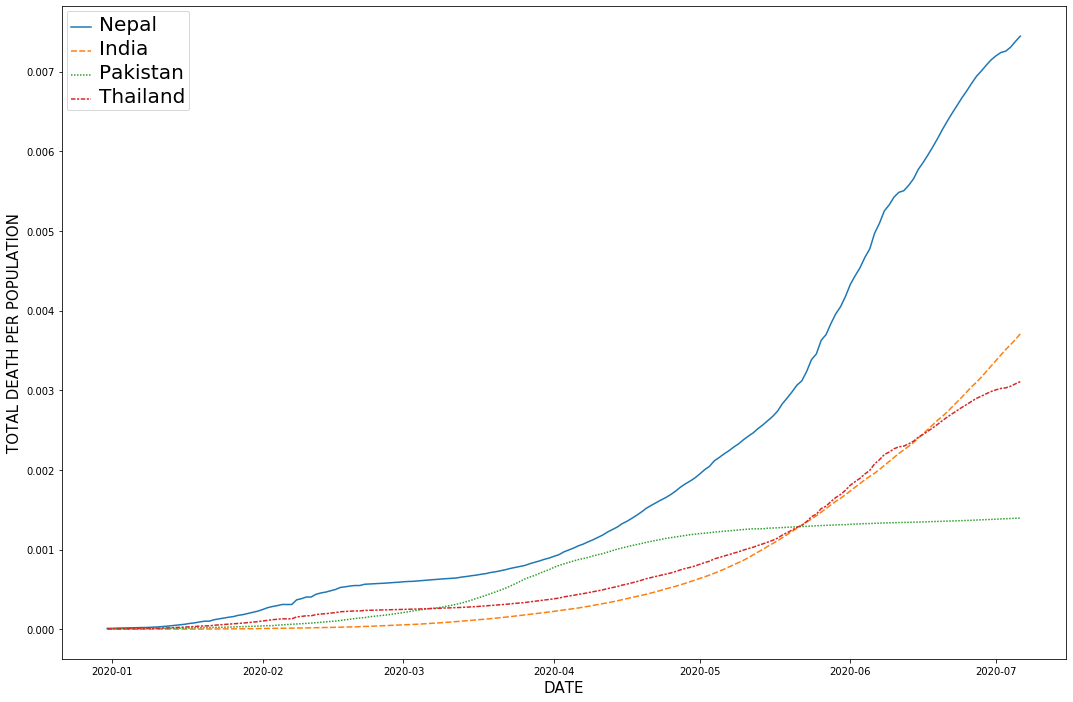

In [53]:
dims = (18,12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.lineplot(ax=ax, data=df_Asia)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='16')
plt.xlabel('DATE',fontsize=15)
plt.ylabel('TOTAL DEATH PER POPULATION',fontsize=15)

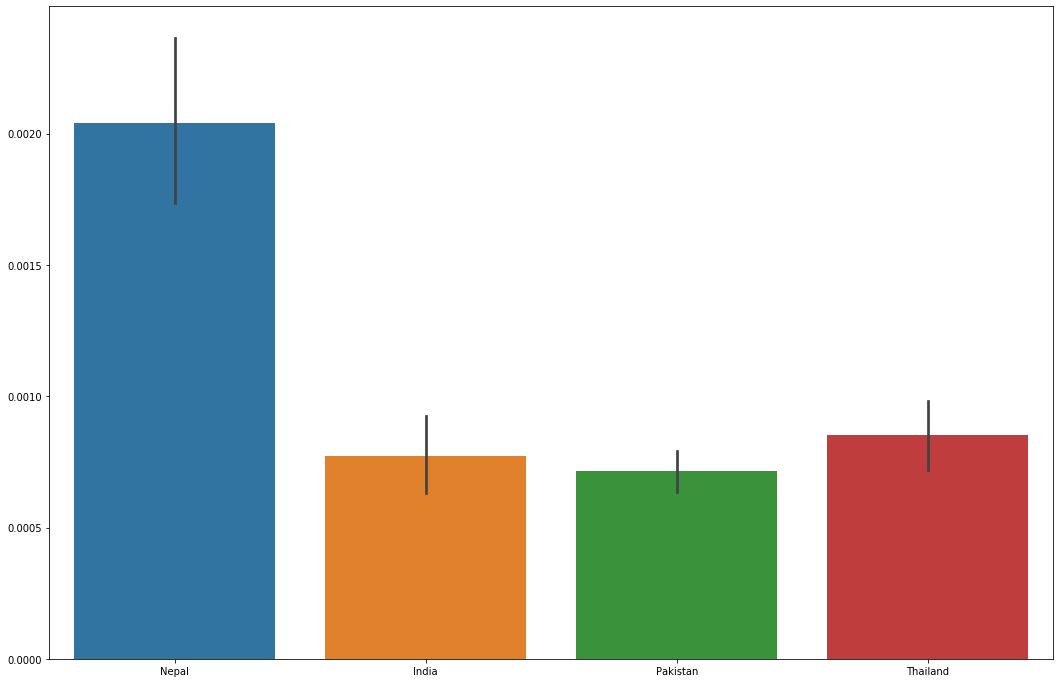

In [54]:

dims = (18,12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(ax=ax, data=df_Asia)

In [55]:
dates_new=[]
dates_new = list(Asia.date)

new_deaths1 = []
Nepal_new = Asia[Asia['location']=='Nepal']
Nepal = Nepal_new.dropna()
for new_deaths in Nepal.new_deaths_smoothed:
  new_deaths1.append(new_deaths)

new_deaths2 = []
India = Asia[Asia['location']=='India']
India = India.dropna()
for new_deaths in India.new_deaths_smoothed:
  new_deaths2.append(new_deaths)

new_deaths3 = []
Pakistan = Asia[Asia['location']=='Pakistan']
Pakistan = Pakistan.dropna()
for new_deaths in Pakistan.new_deaths_smoothed:
  new_deaths3.append(new_deaths)

new_deaths4 = []
Thailand = Asia[Asia['location']=='Thailand']
Thaland = Thailand.dropna()

for new_deaths in Nepal.new_deaths_smoothed:
  new_deaths4.append(new_deaths)

In [56]:
dataframe_new = list(zip(dates_new,new_deaths1,new_deaths2,new_deaths3,new_deaths4))

In [57]:

df_Asia_new = pd.DataFrame(dataframe_new, columns = ['Date','Nepal','India','Pakistan','Thailand'
                                                    ])
df_Asia_new.head()

,Date,Nepal,India,Pakistan,Thailand
0,2019-12-31,0.143,0.143,0.286,0.143
1,2020-01-01,0.286,0.286,0.429,0.286
2,2020-01-02,0.286,0.286,0.429,0.286
3,2020-01-03,0.286,0.286,0.714,0.286
4,2020-01-04,0.286,0.429,0.857,0.286


In [58]:
df_Asia_new = df_Asia_new.set_index('Date')

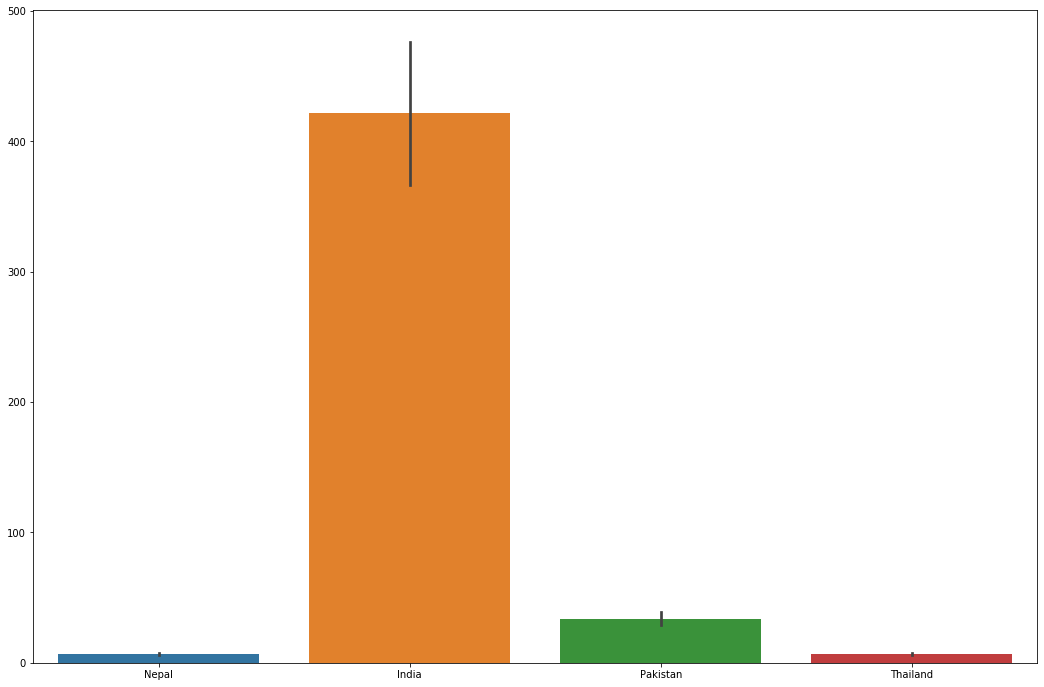

In [59]:
dims = (18,12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(ax=ax, data=df_Asia_new)

In [60]:
Asia_sam = Asia[Asia['location'].isin(['Nepal','India','Pakistan','Thailand'])]

In [61]:
Asia_sam.location.unique()

array(['India', 'Nepal', 'Pakistan', 'Thailand'], dtype=object)

In [62]:
Asia_sam.hospital_beds_per_thousand.unique()

array([0.53, 0.3 , 0.6 , 2.1 ])

In [63]:
Asia_sam.aged_65_older.unique()

array([ 5.989,  5.809,  4.495, 11.373])

In [64]:
Asia_sam.gdp_per_capita.unique()

array([ 6426.674,  2442.804,  5034.708, 16277.671])

In [65]:

Asia_sam.male_smokers.unique()

array([20.6, 37.8, 36.7, 38.8])